In [6]:
import nimfa
import pandas as pd
from feature_engineering import transform_data
import numpy as np

In [4]:
raw_path = "../data/raw/adr6921_Suppl_Excel_v2.csv"

# Read in raw data
df = pd.read_csv(raw_path, encoding_errors='replace')

# Transform data and obtain final dataframe with counts of factories by country and attribute category
df = transform_data(df, False)

# Set 'country' as index
X = df.set_index('country')
# obtain features for clustering
X = X.drop(columns=['total_factories'])

In [5]:
X.head()

,aquaculture by-products,fishery by-products,misc by-products,whole,Alaska Pollack,Albacore Tuna,Anchoveta,Anchovy,Anglerfish,Araucanian Herring,...,Medium reef assoc. fish (30 - 89 cm),Other demersal invertebrates,Shrimps,Small benthopelagics (<30 cm),Small demersals (<30 cm),Small pelagics (<30 cm),Small reef assoc. fish (<30 cm),Small to medium flatfishes (<90 cm),Small to medium rays (<90 cm),Squid
country,,,,,,,,,,,,,,,,,,,,,
Argentina,0.00,0.75,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,...,0.0,0.0,0.25,0.0,0.00,0.00,0.0,0.0,0.0,0.0
Australia,0.00,0.00,0.6,0.40,0.0,0.00,0.00,0.00,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
Brazil,0.00,0.00,1.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
Canada,0.00,1.00,0.0,0.00,0.0,0.14,0.00,0.14,0.0,0.00,...,0.0,0.0,0.00,0.0,0.14,0.29,0.0,0.0,0.0,0.0
Chile,0.33,0.24,0.0,0.82,0.0,0.00,0.12,0.24,0.0,0.15,...,0.0,0.0,0.03,0.0,0.00,0.70,0.0,0.0,0.0,0.0


In [7]:
np_array = X.to_numpy()

In [8]:
np_array

array([[0.  , 0.75, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.6 , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.62, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.69, 0.31, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], shape=(59, 371))

In [9]:
# level of sparsity
print(np.sum(np_array != 0)/np_array.size)

0.043583535108958835


In [10]:
nmf = nimfa.Nmf(np_array,
          seed='random',
          max_iter=200, 
          update='euclidean', 
          objective='fro')

In [13]:
np.mat = np.asmatrix

In [14]:
rank_estimate = nmf.estimate_rank(rank_range=range(2, 15), 
                                  n_run=30, 
                                  what=['cophenetic', 'rss'])

In [15]:
# 3. Extract the results
ranks = list(rank_estimate.keys())
coph_scores = [rank_estimate[r]['cophenetic'] for r in ranks]
rss_scores = [rank_estimate[r]['rss'] for r in ranks]

In [17]:
import matplotlib.pyplot as plt

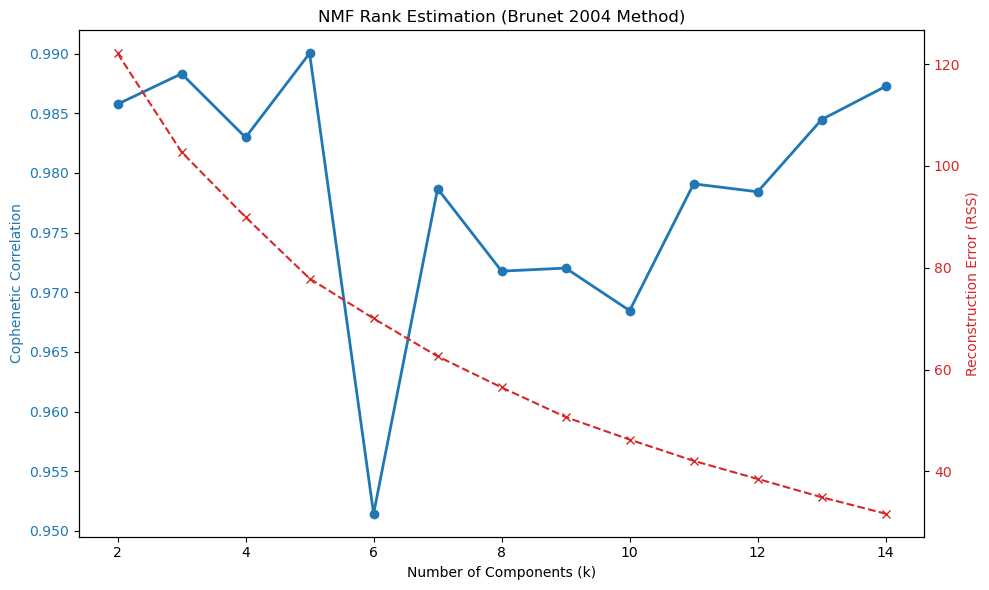

In [18]:
# 4. Plot the results to find the "drop-off"
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Cophenetic Correlation (Look for the drop-off)
color = 'tab:blue'
ax1.set_xlabel('Number of Components (k)')
ax1.set_ylabel('Cophenetic Correlation', color=color)
ax1.plot(ranks, coph_scores, marker='o', color=color, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)

# Plot Reconstruction Error (Look for the elbow)
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Reconstruction Error (RSS)', color=color)  
ax2.plot(ranks, rss_scores, marker='x', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("NMF Rank Estimation (Brunet 2004 Method)")
fig.tight_layout()  
plt.show()